# Imports

In [101]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     ###didnt really use, can remove
import json
import time
import mysql.connector 
from mysql.connector import errorcode
import config_project1



# Connecting to MySQL

In [102]:
cnx = mysql.connector .connect(
    host = config_project1.host,
    user = config_project1.user,
    passwd = config_project1.password,
    database = 'Movies'
)
cursor = cnx.cursor()    

# Web Scrapping for Top 250 and Lowest 100 movies

In [104]:
#Top 250 rated movies
URL1 = "https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=BYZ5JEW58AJEXDTT58SP&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=topenglish&ref_=chttentp_ql_3"
r = requests.get(URL1)

#Buttom 100 rated movies
URL2 = "https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=GNJSYA49KTF016PSH5AD&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=topenglish&ref_=chttentp_ql_8"
r2 = requests.get(URL2) 

soup = BeautifulSoup(r.content+r2.content, 'html.parser')
soup
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify()) 


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [4]:
#flitering for the location of 'titleColumn' AND naming it movie_infos (movie's information is under this class)
soup.find_all( class_='titleColumn')

movie_infos = soup.find_all( class_='titleColumn')


In [5]:
# loop for all of the movie_ids

list_of_ids=[]

#for loop for the id
for i in range(len(movie_infos)):
    id_string = movie_infos[i].find('a')
    id_int = id_string['href'].split('/')[2]
    list_of_ids.append(id_int)

list_of_ids    

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0050083',
 'tt0108052',
 'tt0167260',
 'tt0110912',
 'tt0060196',
 'tt0137523',
 'tt0120737',
 'tt0109830',
 'tt1375666',
 'tt7286456',
 'tt0080684',
 'tt0167261',
 'tt0133093',
 'tt0073486',
 'tt0099685',
 'tt0047478',
 'tt0114369',
 'tt0317248',
 'tt0118799',
 'tt0102926',
 'tt0038650',
 'tt0076759',
 'tt0120815',
 'tt0245429',
 'tt0120689',
 'tt0110413',
 'tt0816692',
 'tt0056058',
 'tt0114814',
 'tt0110357',
 'tt0120586',
 'tt0088763',
 'tt0253474',
 'tt0027977',
 'tt0103064',
 'tt1675434',
 'tt0054215',
 'tt0172495',
 'tt0021749',
 'tt0407887',
 'tt2582802',
 'tt0064116',
 'tt0482571',
 'tt0034583',
 'tt0095327',
 'tt4154796',
 'tt0047396',
 'tt0095765',
 'tt0078748',
 'tt0082971',
 'tt0209144',
 'tt0078788',
 'tt0032553',
 'tt6751668',
 'tt0405094',
 'tt1853728',
 'tt4154756',
 'tt4633694',
 'tt0081505',
 'tt0050825',
 'tt0910970',
 'tt0119698',
 'tt0043014',
 'tt0057012',
 'tt0364569',
 'tt0051201',
 'tt1345836',
 'tt00

In [6]:
# intergrating the movie_ids with the main_url and apikey for GET
urls=[]
main_url = 'http://www.omdbapi.com/?i='  


for i in list_of_ids:
    urls.append(main_url + i + '&apikey=6d18c241')

            


# urls

In [7]:
# Checking reponse for information
test = requests.get('http://www.omdbapi.com/?i=tt0103064&apikey=6d18c241')
test.content

b'{"Title":"Terminator 2: Judgment Day","Year":"1991","Rated":"R","Released":"03 Jul 1991","Runtime":"137 min","Genre":"Action, Sci-Fi","Director":"James Cameron","Writer":"James Cameron, William Wisher","Actors":"Arnold Schwarzenegger, Linda Hamilton, Edward Furlong, Robert Patrick","Plot":"A cyborg, identical to the one who failed to kill Sarah Connor, must now protect her teenage son, John Connor, from a more advanced and powerful cyborg.","Language":"English, Spanish","Country":"USA","Awards":"Won 4 Oscars. Another 27 wins & 27 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMGU2NzRmZjUtOGUxYS00ZjdjLWEwZWItY2NlM2JhNjkxNTFmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.5/10"},{"Source":"Rotten Tomatoes","Value":"93%"},{"Source":"Metacritic","Value":"75/100"}],"Metascore":"75","imdbRating":"8.5","imdbVotes":"926,991","imdbID":"tt0103064","Type":"movie","DVD":"31 Mar 1998","BoxOffice":"$198,116,802","Production":"T

# Making of the tables:


In [8]:

cursor = cnx.cursor()
TABLES = {} #use dictionary to save diff create statements for each table
TABLES['OMDb_Top_250_and_Low_100'] = (
    "  CREATE TABLE OMDb_Top_250_and_Low_100 ("
    "  movie_id varchar(11) NOT NULL primary key,"
    "  movie_name varchar(200) not null,"
    "  rated varchar(20) not null,"
    "  imdb_rating float(2) not null,"
    "  imdb_total_votes int(7) not null,"
    "  metascore int(3) not null,"
    "  release_year int(5) not null,"
    "  runtime varchar(30) not null"
    
") ENGINE=InnoDB")



TABLES['OMDb_Actors'] = (
    "  CREATE TABLE OMDb_Actors ("
    "  movie_id varchar(11) NOT NULL,"
    "  movie_name varchar(200) NOT NULL,"
    "  actors varchar(255) not null"
") ENGINE=InnoDB")
    
    
TABLES['OMDb_Directors'] = (
    "  CREATE TABLE OMDb_Directors ("
    "  movie_id varchar(11) NOT NULL,"
    "  movie_name varchar(200) NOT NULL,"
    "  director varchar(100) not null"
") ENGINE=InnoDB")
    
    
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table OMDb_Top_250_and_Low_100: already exists.
Creating table OMDb_Actors: already exists.
Creating table OMDb_Directors: already exists.


# Populating table Main Table

In [10]:
# Loop to Get response for all the urls & Parsing results with the keys I need

imdb_db = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Rated','imdbRating','imdbVotes', 'Metascore', 'Year', 'Runtime']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_db.append(parsed_results)
        time.sleep(0.1)
        
    
    

KeyboardInterrupt: 

In [ ]:
imdb_db = imdb_db.copy()

In [ ]:
# Making tuple list for Main Table      #### INSERT IGNORE INTO skips duplicate responses

movies_lists = []
for movie in imdb_db:
    movies_tuples = (movie['imdbID'], movie['Title'], movie['Rated'], movie['imdbRating'], movie['imdbVotes'], movie['Metascore'], movie['Year'], movie['Runtime'])
    movies_lists.append(movies_tuples)

    insert_stmt = "INSERT IGNORE INTO OMDb_Top_250_and_Low_100 ( movie_id, movie_name, rated, imdb_rating, imdb_total_votes, metascore, release_year, runtime) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
    cursor.execute(insert_stmt, movies_tuples)
    cnx.commit()
    time.sleep(0.1)

# Populating Table Actors

In [ ]:
imdb_actorss = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Actors']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_actorss.append(parsed_results)
        time.sleep(0.1)

In [ ]:
imdb_actors = imdb_actorss.copy()

In [ ]:
for movie in imdb_actors:
    movie['Actors'] = movie['Actors'].split(',')
    movie['Actors'] = [i.strip() for i in movie['Actors']]

In [ ]:
imdb_actors

In [ ]:
movie_list_actors = []
for movie in imdb_actors:
    
    for i , value in enumerate(movie['Actors']):
        actor_tuple = (movie['imdbID'], movie['Title'],movie['Actors'][i])
        movie_list_actors.append(actor_tuple)
            
movie_list_actors

In [ ]:
    insert_stmt = "INSERT IGNORE OMDb_Actors ( movie_id,movie_name, actors) VALUES (%s, %s, %s)"
    cursor.executemany(insert_stmt, movie_list_actors)
    cnx.commit()
    time.sleep(0.1)

# Populating Table Directors

In [ ]:
# Loop to Get response for all the urls & Parsing results with the keys I need

imdb_db_director = []

for x in urls:

    
        page1 = requests.get(x)
        data = page1.json()
        keys = ['imdbID', 'Title', 'Director']
        parsed_results = {key: (data[key] if key in data else 'Null') for key in keys}
        imdb_db_director.append(parsed_results)
        time.sleep(0.1)
        
    
    

In [ ]:
imdb_db_director = imdb_db_director.copy()

In [ ]:
imdb_db_director

In [ ]:
for movie in imdb_db_director:
    movie['Director'] = movie['Director'].split(',')
    movie['Director'] = [i.strip() for i in movie['Director']]

In [ ]:
movie_list_directors = []
for movie in imdb_db_director:
    
    for i , value in enumerate(movie['Director']):
        actor_tuple = (movie['imdbID'], movie['Title'],movie['Director'][i])
        movie_list_directors.append(actor_tuple)
            
movie_list_directors

In [ ]:
    insert_stmt = "INSERT IGNORE INTO OMDb_Directors ( movie_id,movie_name, director) VALUES (%s, %s, %s)"
    cursor.executemany(insert_stmt, movie_list_directors)
    cnx.commit()
    time.sleep(0.1)

# Making DataFrames

In [11]:
cnx = mysql.connector.connect(
    host = config_project1.host,
    user = config_project1.user,
    passwd = config_project1.password,
    database = 'Movies'
)
cursor = cnx.cursor()
#calling the joined tables of Movies and Actors tables

# cursor.execute(  """SELECT * 
#                     FROM Movies.OMDb_Top_250_and_Low_100 l
#                     INNER JOIN Movies.OMDb_Actors  a where a.movie_id = l.movie_id
#                     order by a.Actors;""")
                        
# df = pd.DataFrame(cursor.fetchall())

# df.columns=['imdbID', 'Title', 'Rated','imdbRating','imdbVotes', 'Metascore', 'Year', 'Runtime','imdbID', 'Title', 'Actors']



# Actors in 8 or higher IMDb Rating

In [60]:
cursor.execute(  """SELECT a.actors,count(a.actors), avg(imdb_rating)
                    FROM Movies.OMDb_Top_250_and_Low_100 l
                    INNER JOIN Movies.OMDb_Actors  a 
                    where a.movie_id = l.movie_id and imdb_rating >=8
                    group by a.actors
                    having count(a.actors)>1
                    order by count(a.actors) desc limit 30
                    ;""")
                        
df_rating_freq = pd.DataFrame(cursor.fetchall())

df_rating_freq.columns=['Actors','Frequency','ImdbRating']



In [61]:
df_rating_freq

,Actors,Frequency,ImdbRating
0,Robert De Niro,8,8.462500
1,Leonardo DiCaprio,6,8.350000
2,Harrison Ford,6,8.383333
3,Aamir Khan,6,8.283333
4,Tom Hanks,6,8.450000
5,Clint Eastwood,5,8.300000
6,Al Pacino,4,8.675000
7,Charles Chaplin,4,8.375000
8,Jack Nicholson,4,8.450000
9,James Stewart,4,8.375000


In [62]:
list(df_rating_freq.Actors)

['Robert De Niro',
 'Leonardo DiCaprio',
 'Harrison Ford',
 'Aamir Khan',
 'Tom Hanks',
 'Clint Eastwood',
 'Al Pacino',
 'Charles Chaplin',
 'Jack Nicholson',
 'James Stewart',
 'Tom Hardy',
 'Morgan Freeman',
 'Mark Ruffalo',
 'Christian Bale',
 'Brad Pitt',
 'Mark Hamill',
 'Ralph Fiennes',
 'Toshirô Mifune',
 'Hugh Jackman',
 'Paul Newman',
 'Gunnar Björnstrand',
 'Steve Buscemi',
 'Michael Caine',
 'Carrie Fisher',
 'Takashi Shimura',
 'Tatsuya Nakadai',
 'Jack Hawkins',
 'William Holden',
 'Robert Duvall',
 'Sean Astin']

Text(0, 0.5, 'Values')

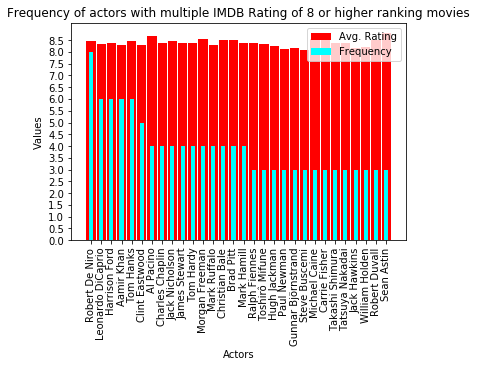

In [99]:
# Graph of frequency of Actors with a  Avg IMDB Movie rating of 8 or Higher ***  W/ OVERLAYING BARS

plt.bar(df_rating_freq.Actors,df_rating_freq.ImdbRating, width= 0.90, label = 'Avg. Rating', color = 'red')
plt.bar(df_rating_freq.Actors, df_rating_freq['Frequency'],  width= 0.40, label= 'Frequency', color = 'cyan')
plt.legend()
plt.title('Frequency of actors with multiple IMDB Rating of 8 or higher ranking movies')
plt.xticks(list(df_rating_freq.Actors), rotation = 90)
plt.yticks(np.arange(0,9,0.5))
plt.xlabel('Actors')   
plt.ylabel('Values')



In [53]:
# summary of the DATAFRAME
df_rating_freq.describe()

,Frequency,ImdbRating
count,118.000000,118.000000
mean,2.550847,8.321646
std,1.066967,0.170116
min,2.000000,8.050000
25%,2.000000,8.200000
50%,2.000000,8.300000
75%,3.000000,8.445833
max,8.000000,8.850000


# Actors in movies with a IMDb Rating of 4.5 or lower

In [64]:
cursor.execute(  """SELECT a.actors,count(a.actors), avg(imdb_rating)
                    FROM Movies.OMDb_Top_250_and_Low_100 l
                    INNER JOIN Movies.OMDb_Actors  a 
                    where a.movie_id = l.movie_id and imdb_rating <=4.5
                    group by a.actors
                    having count(a.actors)>1
                    order by count(a.actors) desc
                    ;""")
                        
df_low_rating_freq = pd.DataFrame(cursor.fetchall())

df_low_rating_freq.columns=['Actors','Frequency','ImdbRating']




In [65]:
df_low_rating_freq

,Actors,Frequency,ImdbRating
0,Stephen Dorff,3,3.00
1,Marlon Wayans,2,3.55
2,Nicolas Cage,2,3.40
3,Shaquille O'Neal,2,2.85
4,Chris Klein,2,3.40
5,Diedrich Bader,2,3.30
6,Skyler Shaye,2,2.45
7,Uma Thurman,2,3.75
8,Matt Lanter,2,2.65
9,Adam Campbell,2,2.60


Text(0, 0.5, 'Values')

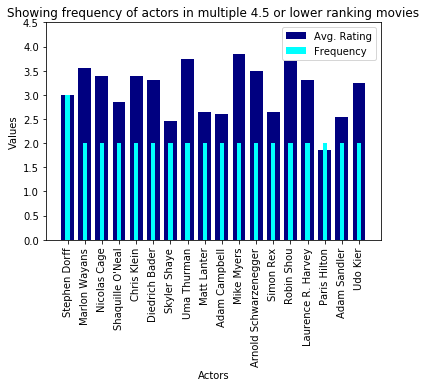

In [97]:
#Graph of frequency of Actors with a IMDB Movie rating of 8 or Higher
fig=
plt.bar(df_low_rating_freq.Actors,df_low_rating_freq.ImdbRating, width= 0.75, label = 'Avg. Rating', color = 'navy')
plt.bar(df_low_rating_freq.Actors, df_low_rating_freq['Frequency'],  width= 0.25, label= 'Frequency', color = 'cyan')
plt.title('Frequency of actors in multiple 4.5 or lower ranking movies')
plt.legend()


plt.xticks(list(df_low_rating_freq.Actors), rotation = 90)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Actors')   
plt.ylabel('Values')



# Scatterplot of the Avg rating of top 250 and lower 100

# """Not finished""" 

In [105]:
cursor.execute(  """SELECT a.actors,count(a.actors), avg(imdb_rating)
                    FROM Movies.OMDb_Top_250_and_Low_100 l
                    INNER JOIN Movies.OMDb_Actors  a 
                    where a.movie_id = l.movie_id and imdb_rating >=8
                    group by a.actors
                    having count(a.actors)>1
                    order by count(a.actors) desc
                    ;""")
                        
df_rating_freq_all = pd.DataFrame(cursor.fetchall())

In [106]:
plt.scatter(df_rating_freq_all.Actors + df_low_rating_freq.Actors, df_rating_freq_all['Frequency'] + df_low_rating_freq['Frequency'], s=area, c=colors, alpha=0.5)
plt.title('Scatter plot of the Avg IMDb Rating')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Actors'